## Ciencia de Datos en Python
### Edi Antonio Ordoñez Hernández
#### Carné 9912628
## --------------------------------------------------------------------------------------

## Proyecto Final

#### Descripción: El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal univariable sencillos.

#### 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

##### 1.1 Importando paquetes a utilizar

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression

##### 1.2 Cargando datos

In [5]:
TrainingData = np.load('proyecto_training_data.npy')

##### 1.3 Presentando Información

In [8]:
DataGlobal = pd.DataFrame(TrainingData)
DataGlobal

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


#### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).

##### 2.1 Asignando data de entrenamiento (80%)

In [10]:
DataSet_Train = DataGlobal.iloc[:int(DataGlobal[0].count()*.8)]
DataSet_Train.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                            'Original construction date', 'Linear feet of street connected to property'], 
                    axis='columns', inplace=True)
DataSet_Train

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


##### 2.1 Asignando data de Validación y Pruebas (20%)

In [11]:
DataSet_Test = DataGlobal.iloc[:int(DataGlobal[0].count()*.2)]
DataSet_Test.set_axis(['SalePrice', 'OverallQual', 'First Floor square feet','Total rooms above grade', 
                            'Original construction date', 'Linear feet of street connected to property'], 
                    axis='columns', inplace=True)
DataSet_Test

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
287,88000.0,4.0,858.0,5.0,1971.0,NaN
288,122000.0,5.0,900.0,5.0,1967.0,NaN
289,153575.0,6.0,698.0,7.0,1915.0,60.0
290,233230.0,8.0,1079.0,8.0,2006.0,120.0


#### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):

##### 3.1 Media

In [16]:
Media = DataSet_Train.mean(axis=0)
Media

SalePrice                                      180590.277397
OverallQual                                         6.101027
First Floor square feet                          1156.323630
Total rooms above grade                             6.485445
Original construction date                       1971.451199
Linear feet of street connected to property        69.946985
dtype: float64

##### 3.2 valor máximo

In [17]:
Maximo = DataSet_Train.max(axis=0)
Maximo

SalePrice                                      755000.0
OverallQual                                        10.0
First Floor square feet                          3228.0
Total rooms above grade                            14.0
Original construction date                       2010.0
Linear feet of street connected to property       313.0
dtype: float64

##### 3.3 valor mínimo

In [20]:
Minimo = DataSet_Train.min(axis=0)
Minimo

SalePrice                                      34900.0
OverallQual                                        1.0
First Floor square feet                          334.0
Total rooms above grade                            2.0
Original construction date                      1875.0
Linear feet of street connected to property       21.0
dtype: float64

##### 3.4 Rango Peak to Peak

In [23]:
Rangopp = DataSet_Train.ndim
Rangopp

2

##### 3.5 Desviación Estándar

In [22]:
DesviacionEst = DataSet_Train.std(axis=0)
DesviacionEst

SalePrice                                      78815.697902
OverallQual                                        1.378025
First Floor square feet                          373.780374
Total rooms above grade                            1.609141
Original construction date                        29.951707
Linear feet of street connected to property       23.478161
dtype: float64

##### 3.6 Descriptivo de datos

In [24]:
DataSet_Train.describe()

,SalePrice,OverallQual,First Floor square feet,Total rooms above grade,Original construction date,Linear feet of street connected to property
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### 4. Para cada variable en el dataset usar seaborn
##### (función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para gráficar un histograma de la variable.

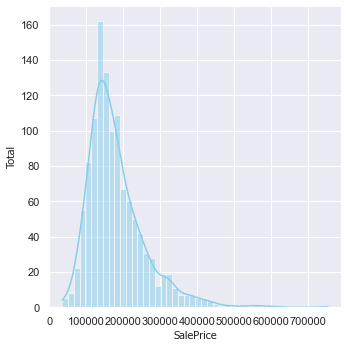

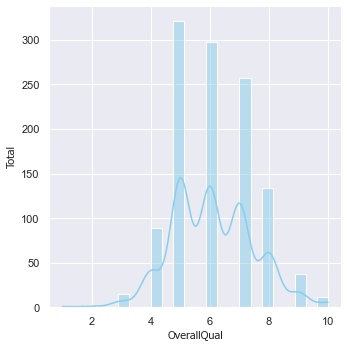

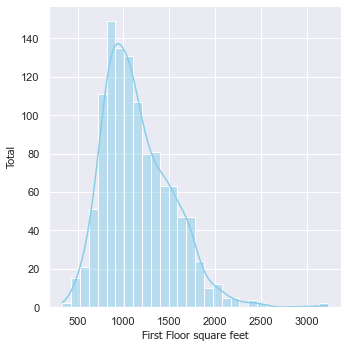

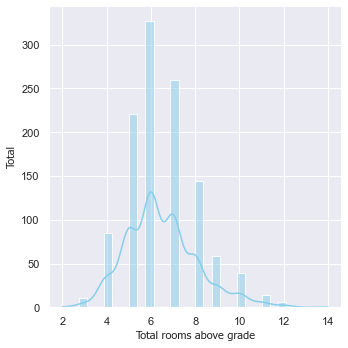

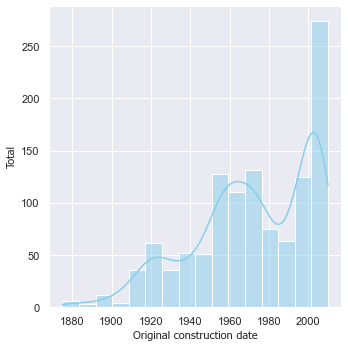

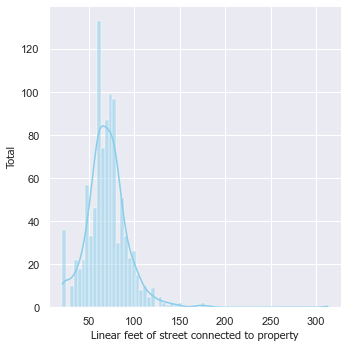

In [65]:
for i in DataSet_Train.columns.values:
    sns.set(style="darkgrid")
    graf = sns.displot(DataSet_Train[i], color="skyblue", kde=True)
    plt.xlabel(i, fontsize = 11, family='Tahoma')
    plt.ylabel('Total', fontsize = 11, family='Tahoma')
    plt.show()

#### 5. Para cada variable independiente x

##### 5.1 Calcular el coeficiente de correlación entre x y y.
##### 5.2 Graficar x vs y(scatterplot) usando matplotlib
##### 5.3 Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

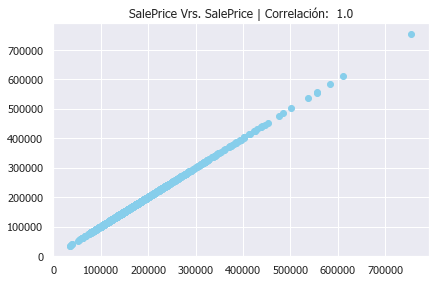

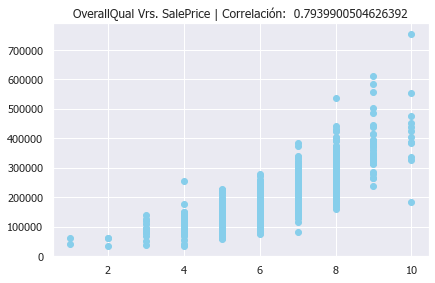

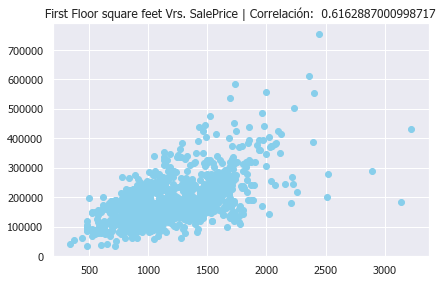

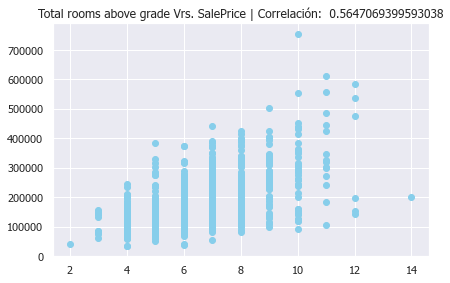

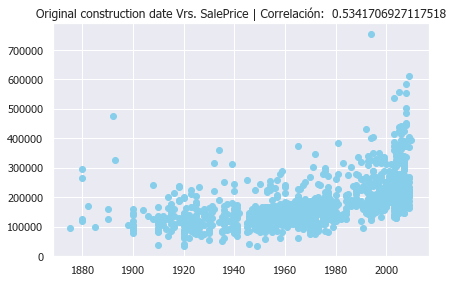

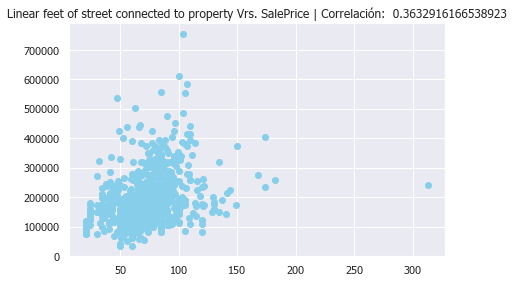

In [67]:
GrafCorrelacion= []
for i in DataSet_Train.columns.values:
    DataCorrelacion = (pd.DataFrame(DataSet_Train[[i,'SalePrice']]).corr().iloc[0,1])
    GrafCorrelacion.append(DataCorrelacion)
    plt.scatter(DataSet_Train[i], DataSet_Train['SalePrice'], color="skyblue")
    plt.xticks(fontsize = 11, family='Tahoma')
    plt.yticks(fontsize = 11, family='Tahoma')
    plt.title(str(i)+' Vrs. ' + str('SalePrice') + ' | Correlación:  '+str((DataCorrelacion)), family='Tahoma')
    plt.show()

##### 5.4 Calcular el coeficiente de correlación entre x y y.

In [74]:
MisCorrelaciones = pd.DataFrame({'Correlaciones':GrafCorrelacion},index=[DataSet_Train.columns.values])
MisCorrelaciones

,Correlaciones
SalePrice,1.000000
OverallQual,0.793990
First Floor square feet,0.616289
Total rooms above grade,0.564707
Original construction date,0.534171
Linear feet of street connected to property,0.363292


##### 5.5 Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [72]:
MisCorrelaciones.sort_values(by='Correlaciones', ascending = False)[1:3]

,Correlaciones
OverallQual,0.793990
First Floor square feet,0.616289
